In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# 초기화 (Initialization)

뉴럴넷에서는 변수 초기화가 잘 되어야 한다

예제 1

레이어 10개, 각 레이어에는 500개 뉴런 있다고 가정

## 1. small random number => 평균이 0, 표준편차 0.01 가우시안 분포

In [0]:
# w = np.random.randn(입력, 출력) * 0.01


In [0]:
np.random.seed(0)
D = np.random.randn(1000,500)
hidden_layer_sizes = [500] * 10
hidden_layer_sizes
Hs = {}

입력 계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 -0.000090 and 표준편차 0.213216
히든 계층 2 평균 -0.000001 and 표준편차 0.047702
히든 계층 3 평균 0.000007 and 표준편차 0.010685
히든 계층 4 평균 0.000000 and 표준편차 0.002385
히든 계층 5 평균 0.000000 and 표준편차 0.000535
히든 계층 6 평균 -0.000000 and 표준편차 0.000120
히든 계층 7 평균 -0.000000 and 표준편차 0.000027
히든 계층 8 평균 -0.000000 and 표준편차 0.000006
히든 계층 9 평균 0.000000 and 표준편차 0.000001
히든 계층 10 평균 -0.000000 and 표준편차 0.000000


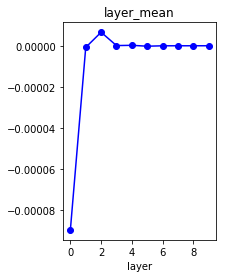

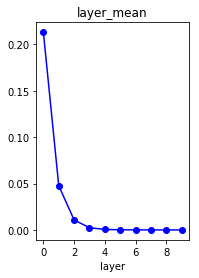

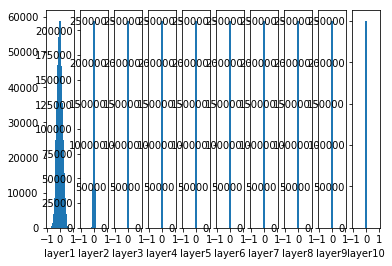

In [18]:
for i in range(len(hidden_layer_sizes)):
  X = D if i == 0 else Hs[i-1]
  fan_in = X.shape[1]
  fan_out = hidden_layer_sizes[i]
  w = np.random.randn(fan_in, fan_out) * 0.01
  H = np.dot(X,w)
  H = np.tanh(H)
  Hs[i] = H
  
print("입력 계층 평균 %f and 표준편차 %f" % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
  print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, "ob-")
plt.xlabel("layer")
plt.title("layer_mean")

plt.figure()
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, "ob-")
plt.xlabel("layer")
plt.title("layer_mean")

plt.figure()
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1, 1))
  plt.xlabel("layer"+str(i+1))
plt.show()
  

## 2. 평균 0, 표준편차 1

입력 계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 0.003144 and 표준편차 0.981845
히든 계층 2 평균 -0.002710 and 표준편차 0.981721
히든 계층 3 평균 -0.001154 and 표준편차 0.981697
히든 계층 4 평균 0.000302 and 표준편차 0.981737
히든 계층 5 평균 0.001724 and 표준편차 0.981748
히든 계층 6 평균 -0.000425 and 표준편차 0.981416
히든 계층 7 평균 0.000886 and 표준편차 0.981768
히든 계층 8 평균 -0.000100 and 표준편차 0.981623
히든 계층 9 평균 0.003496 and 표준편차 0.981771
히든 계층 10 평균 0.000413 and 표준편차 0.981528


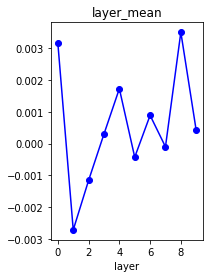

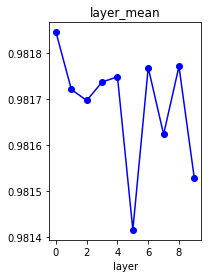

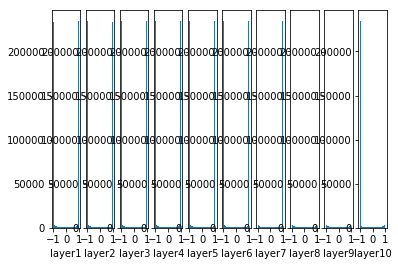

In [19]:
for i in range(len(hidden_layer_sizes)):
  X = D if i == 0 else Hs[i-1]
  fan_in = X.shape[1]
  fan_out = hidden_layer_sizes[i]
#   w = np.random.randn(fan_in, fan_out) * 0.01

  w = np.random.randn(fan_in, fan_out)

  H = np.dot(X,w)
  H = np.tanh(H)
  Hs[i] = H
  
print("입력 계층 평균 %f and 표준편차 %f" % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
  print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, "ob-")
plt.xlabel("layer")
plt.title("layer_mean")

plt.figure()
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, "ob-")
plt.xlabel("layer")
plt.title("layer_mean")

plt.figure()
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1, 1))
  plt.xlabel("layer"+str(i+1))
plt.show()

## 3. Xavier 초기화

입력 계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 0.000293 and 표준편차 0.627083
히든 계층 2 평균 0.000856 and 표준편차 0.485639
히든 계층 3 평균 -0.000349 and 표준편차 0.408021
히든 계층 4 평균 0.000084 and 표준편차 0.357239
히든 계층 5 평균 0.000412 and 표준편차 0.320848
히든 계층 6 평균 0.000390 and 표준편차 0.292810
히든 계층 7 평균 -0.000469 and 표준편차 0.272640
히든 계층 8 평균 0.000391 and 표준편차 0.255871
히든 계층 9 평균 0.000130 and 표준편차 0.240300
히든 계층 10 평균 0.000231 and 표준편차 0.227898


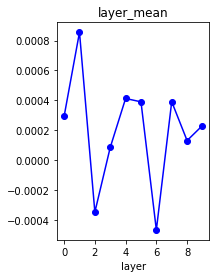

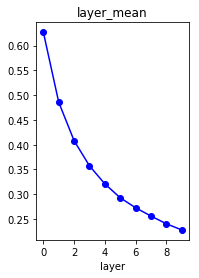

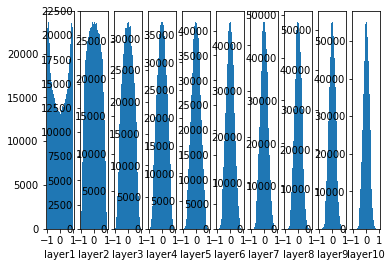

In [20]:
for i in range(len(hidden_layer_sizes)):
  X = D if i == 0 else Hs[i-1]
  fan_in = X.shape[1]
  fan_out = hidden_layer_sizes[i]
#   w = np.random.randn(fan_in, fan_out) * 0.01
#   w = np.random.randn(fan_in, fan_out)
  
  w = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)

  H = np.dot(X,w)
  H = np.tanh(H)
  Hs[i] = H
  
print("입력 계층 평균 %f and 표준편차 %f" % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
  print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, "ob-")
plt.xlabel("layer")
plt.title("layer_mean")

plt.figure()
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, "ob-")
plt.xlabel("layer")
plt.title("layer_mean")

plt.figure()
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1, 1))
  plt.xlabel("layer"+str(i+1))
plt.show()

## 4. He 초기화

입력 계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 0.000392 and 표준편차 0.720289
히든 계층 2 평균 -0.001379 and 표준편차 0.631571
히든 계층 3 평균 -0.000140 and 표준편차 0.594529
히든 계층 4 평균 -0.000331 and 표준편차 0.575953
히든 계층 5 평균 0.001304 and 표준편차 0.567250
히든 계층 6 평균 -0.001015 and 표준편차 0.561501
히든 계층 7 평균 -0.001736 and 표준편차 0.560393
히든 계층 8 평균 0.000582 and 표준편차 0.558772
히든 계층 9 평균 -0.000694 and 표준편차 0.557838
히든 계층 10 평균 0.000310 and 표준편차 0.556595


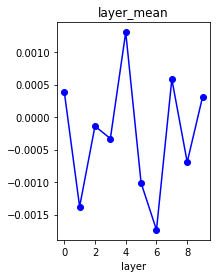

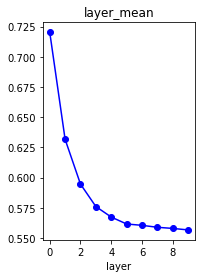

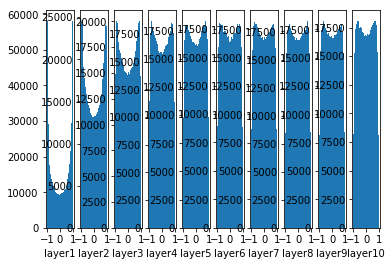

In [21]:
for i in range(len(hidden_layer_sizes)):
  X = D if i == 0 else Hs[i-1]
  fan_in = X.shape[1]
  fan_out = hidden_layer_sizes[i]
#   w = np.random.randn(fan_in, fan_out) * 0.01
#   w = np.random.randn(fan_in, fan_out)
#   w = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
  w = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2)

  H = np.dot(X,w)
  H = np.tanh(H)
  Hs[i] = H
  
print("입력 계층 평균 %f and 표준편차 %f" % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
  print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, "ob-")
plt.xlabel("layer")
plt.title("layer_mean")

plt.figure()
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, "ob-")
plt.xlabel("layer")
plt.title("layer_mean")

plt.figure()
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1, 1))
  plt.xlabel("layer"+str(i+1))
plt.show()

# MNIST 데이터에 Xavier 활용

In [23]:
mnist = input_data.read_data_sets("MNIST/data", one_hot=True)

W0806 01:45:10.479381 140275211769728 deprecation.py:323] From <ipython-input-23-f7df3279de6a>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0806 01:45:10.483364 140275211769728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0806 01:45:10.485205 140275211769728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remove

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST/data/train-images-idx3-ubyte.gz


W0806 01:45:10.917806 140275211769728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0806 01:45:10.920828 140275211769728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0806 01:45:11.013906 140275211769728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/data/t10k-labels-idx1-ubyte.gz


In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [0]:
tf.reset_default_graph()    # 그래프에 있는 모든 텐서를 초기화

x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])

w1 = tf.get_variable("w1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = tf.get_variable("w2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,w2)+b2)

w3 = tf.get_variable("w3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(L2,w3)+b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [33]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    myfeed = {x:batch_xs, y:batch_ys}
    cv, _ = sess.run([cost, train], feed_dict=myfeed)
    avg_cost += cv/total_batch
  print("epoch: ", epoch, ", cost: ", "{:.9f}".format(avg_cost))

c_pre = tf.equal(tf.argmax(hf, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("accuracy: ", sess.run(acc, feed_dict={x:mnist.test.images, y: mnist.test.labels}))

epoch:  0 , cost:  0.316432801
epoch:  1 , cost:  0.113517317
epoch:  2 , cost:  0.074820179
epoch:  3 , cost:  0.052918217
epoch:  4 , cost:  0.038361981
epoch:  5 , cost:  0.029562305
epoch:  6 , cost:  0.024533527
epoch:  7 , cost:  0.020728858
epoch:  8 , cost:  0.016960348
epoch:  9 , cost:  0.013038753
epoch:  10 , cost:  0.010096995
epoch:  11 , cost:  0.009637329
epoch:  12 , cost:  0.014096807
epoch:  13 , cost:  0.012102588
epoch:  14 , cost:  0.006897038
accuracy:  0.9803


## 더 wide하고 deep하게

In [0]:
tf.reset_default_graph()    # 그래프에 있는 모든 텐서를 초기화

x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])

w1 = tf.get_variable("w1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = tf.get_variable("w2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1,w2)+b2)

w3 = tf.get_variable("w3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2,w3)+b3)

w4 = tf.get_variable("w4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3,w4)+b4)

w5 = tf.get_variable("w5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(L4,w5)+b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [37]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    myfeed = {x:batch_xs, y:batch_ys}
    cv, _ = sess.run([cost, train], feed_dict=myfeed)
    avg_cost += cv/total_batch
  print("epoch: ", epoch, ", cost: ", "{:.9f}".format(avg_cost))

c_pre = tf.equal(tf.argmax(hf, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("accuracy: ", sess.run(acc, feed_dict={x:mnist.test.images, y: mnist.test.labels}))

epoch:  0 , cost:  0.299199444
epoch:  1 , cost:  0.107043273
epoch:  2 , cost:  0.071600116
epoch:  3 , cost:  0.052045774
epoch:  4 , cost:  0.040798748
epoch:  5 , cost:  0.032659121
epoch:  6 , cost:  0.029629554
epoch:  7 , cost:  0.031505523
epoch:  8 , cost:  0.020831438
epoch:  9 , cost:  0.023287817
epoch:  10 , cost:  0.019615708
epoch:  11 , cost:  0.017524648
epoch:  12 , cost:  0.018691013
epoch:  13 , cost:  0.014094432
epoch:  14 , cost:  0.014937396
accuracy:  0.9784


## drop out 적용

In [38]:
tf.reset_default_graph()    # 그래프에 있는 모든 텐서를 초기화

x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])

keep_prob = tf.placeholder(tf.float32)

w1 = tf.get_variable("w1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(x,w1)+b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

w2 = tf.get_variable("w2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1,w2)+b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

w3 = tf.get_variable("w3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2,w3)+b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

w4 = tf.get_variable("w4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3,w4)+b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

w5 = tf.get_variable("w5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(L4,w5)+b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

W0806 02:35:26.823409 140275211769728 deprecation.py:506] From <ipython-input-38-6b3df8f59bf3>:11: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [39]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    myfeed = {x:batch_xs, y:batch_ys, keep_prob:0.7}    # keep_prob을 여기선 0.7로 주고,
    cv, _ = sess.run([cost, train], feed_dict=myfeed)
    avg_cost += cv/total_batch
  print("epoch: ", epoch, ", cost: ", "{:.9f}".format(avg_cost))

c_pre = tf.equal(tf.argmax(hf, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("accuracy: ", sess.run(acc, feed_dict={x:mnist.test.images, y: mnist.test.labels, keep_prob:1}))    # keep_prob을 여기선 1로 준다

epoch:  0 , cost:  0.464170702
epoch:  1 , cost:  0.171497762
epoch:  2 , cost:  0.130378525
epoch:  3 , cost:  0.107076242
epoch:  4 , cost:  0.089509174
epoch:  5 , cost:  0.080488076
epoch:  6 , cost:  0.073232453
epoch:  7 , cost:  0.071924995
epoch:  8 , cost:  0.059641357
epoch:  9 , cost:  0.057695029
epoch:  10 , cost:  0.054936213
epoch:  11 , cost:  0.050708580
epoch:  12 , cost:  0.051026984
epoch:  13 , cost:  0.051641336
epoch:  14 , cost:  0.045733760
accuracy:  0.9819


# Convolutional Neural Networks (CNN)

## mnist model based CNN

In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [0]:
tf.reset_default_graph()    # 그래프에 있는 모든 텐서를 초기화

x = tf.placeholder(tf.float32, [None, 28*28])
ximg = tf.reshape(x, [-1, 28, 28, 1])    # img 28*28*1 (black/white)
y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.Variable(tf.random_normal([3, 3, 1, 32]))    # filter가 32개    # 순서대로 행, 열, depth, filter 갯수
L1 = tf.nn.conv2d(ximg, w1, strides=[1, 1, 1, 1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
# L1 이미지 shape => (?, 28, 28, 1)
# conv => (?, 28, 28, 32)
# pooling => (?, 14, 14, 32)

w2 = tf.Variable(tf.random_normal([3, 3, 32, 64]))    # 순서대로 행, 열, depth, filter 갯수
L2 = tf.nn.conv2d(L1, w2, strides=[1, 1, 1, 1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
# conv2d => (?, 14, 14, 64)
# relu => (?, 14, 14, 64)
# max_pool => (?, 7, 7, 64)

L2_flat = tf.reshape(L2, [-1, 7*7*64])
# reshape => (?, 7*7*64)

w3 = tf.get_variable("w3", shape=[7*7*64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, w3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
train = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [49]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    myfeed = {x:batch_xs, y:batch_ys}
    cv, _ = sess.run([cost, train], feed_dict=myfeed)
    avg_cost += cv/total_batch
  print("epoch: ", epoch, ", cost: ", "{:.9f}".format(avg_cost))

c_pre = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("accuracy: ", sess.run(acc, feed_dict={x:mnist.test.images, y: mnist.test.labels}))

epoch:  0 , cost:  1.109004825
epoch:  1 , cost:  0.232722507
epoch:  2 , cost:  0.165563938
epoch:  3 , cost:  0.098288641
epoch:  4 , cost:  0.072081829
epoch:  5 , cost:  0.043952723
epoch:  6 , cost:  0.044662407
epoch:  7 , cost:  0.032402095
epoch:  8 , cost:  0.030341783
epoch:  9 , cost:  0.026832980
epoch:  10 , cost:  0.021023203
epoch:  11 , cost:  0.022470148
epoch:  12 , cost:  0.020226040
epoch:  13 , cost:  0.021856469
epoch:  14 , cost:  0.011699244
accuracy:  0.9849
